<h1><center>MNIST classification using Keras<center></h1>

# Importing Keras

In [78]:
# Importing the Keras main module forcing tensorflow 1.x backend
import tensorflow as tf
import keras
import time
print("Using tensorflow version " + str(tf.__version__))
print("Using keras version " + str(keras.__version__))

Using tensorflow version 1.14.0
Using keras version 2.3.1


## Loading and preparing the MNIST dataset

Again, load the dataset via ```keras.datasets```, turn train and test labels into one-hot encoding, and reshape and normalize data as in the first exercise. 

In [79]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [80]:
from keras.utils.np_utils import to_categorical

train_labels=to_categorical(y_train)
test_labels=to_categorical(y_test)

train_labels.shape

(60000, 10)

In [81]:
# Reshape to proper images with 1 color channel according to backend scheme
img_rows, img_cols = x_train.shape[1], x_train.shape[2]

train_images = x_train.reshape((x_train.shape[0],img_rows*img_cols))
test_images = x_test.reshape((x_test.shape[0],img_rows*img_cols))

# Cast pixels from uint8 to float32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')


# Now let us normalize the images so that they have zero mean and standard deviation
# Hint: are real testing data statistics known at training time ?

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_images)
train_images=scaler.transform(train_images)

scaler.fit(test_images)
test_images=scaler.transform(test_images)

## Defining the neural network architecture (i.e., the network model)

You can take a look at this [cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Keras_Cheat_Sheet_Python.pdf) for some basic commands to use keras.

First, try to replicate the classifier of the first exercise. Secondly, create a fully connected network.
For the fully connected layer, you can for example use this architecture: 
$$ (784) \rightarrow (300) \rightarrow (10) $$
For this first implementation of the network, use only sigmoid activations in the hidden layer. Remember to use the right output activation function ! 

In [111]:
# The Sequential module is a container for more complex NN elements and
# defines a loop-less NN architecture
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

input_shape = 784
output_shape = 10

model_sig = Sequential()
model_sig.add(Dense(300, input_dim=input_shape, activation='sigmoid'))
model_sig.add(Dense(output_shape, activation='softmax'))

Instantiate a SGD optimizer with a tentative learning rate of $\\eta = 10^{-2}$ and, using the appropriate loss function (which is called, in keras, ```'categorical_crossentropy'```) and compile the model.

In [112]:
# The optimizers module provides a number of optimization algorithms for updating
# a netwok parameters accoridng to the computed error gradints
from keras import optimizers

eta = 0.01
sgd = optimizers.SGD(lr = eta)
model_sig.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

# We can now have a look at the defined model topology
model.summary()

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_121 (Dense)            (None, 300)               235500    
_________________________________________________________________
dense_122 (Dense)            (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


## Training the network

Train the model for 10 epochs using the ```.fit()``` method, validating the model at each epoch and keeping track of the training history for later plotting. Make sure you enable ```.fit()``` verbose mode in order to visualize the training.

In order to accelerate training, use the ```batch_size``` option of ```.fit()```, which will process a batch of examples at the same time, and make one update for all of them, averaged over the gradients for each training example of the batch. You can begin with a small size, and experiment with a larger size later.

In [87]:
# This is where the actual training-testing happens
# Number of epochs we want to train
epochs = 10

history_sig=model_sig.fit(train_images, 
                  train_labels, 
                  epochs=epochs, 
                  batch_size=10,
                  verbose=2,
                  validation_data=(test_images,test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 30s - loss: 0.4860 - accuracy: 0.8709 - val_loss: 0.3081 - val_accuracy: 0.9085
Epoch 2/10
 - 33s - loss: 0.2852 - accuracy: 0.9172 - val_loss: 0.2632 - val_accuracy: 0.9223
Epoch 3/10
 - 32s - loss: 0.2528 - accuracy: 0.9270 - val_loss: 0.2461 - val_accuracy: 0.9284
Epoch 4/10
 - 33s - loss: 0.2314 - accuracy: 0.9339 - val_loss: 0.2335 - val_accuracy: 0.9326
Epoch 5/10
 - 32s - loss: 0.2147 - accuracy: 0.9382 - val_loss: 0.2224 - val_accuracy: 0.9347
Epoch 6/10
 - 32s - loss: 0.1998 - accuracy: 0.9433 - val_loss: 0.2104 - val_accuracy: 0.9391
Epoch 7/10
 - 38s - loss: 0.1863 - accuracy: 0.9471 - val_loss: 0.2013 - val_accuracy: 0.9416
Epoch 8/10
 - 34s - loss: 0.1742 - accuracy: 0.9509 - val_loss: 0.1917 - val_accuracy: 0.9438
Epoch 9/10
 - 31s - loss: 0.1632 - accuracy: 0.9541 - val_loss: 0.1837 - val_accuracy: 0.9475
Epoch 10/10
 - 35s - loss: 0.1530 - accuracy: 0.9577 - val_loss: 0.1770 - val_accuracy: 0.9491


## Visualizing the network performance

Visualize the training history using the ```pyplot``` package:
- In one graph, plot the train and vaidation loss functions,
- In another graph, the train and validation accuracy.
By comparing the training the testing curves, what can we conclude about the quality of the training ?

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


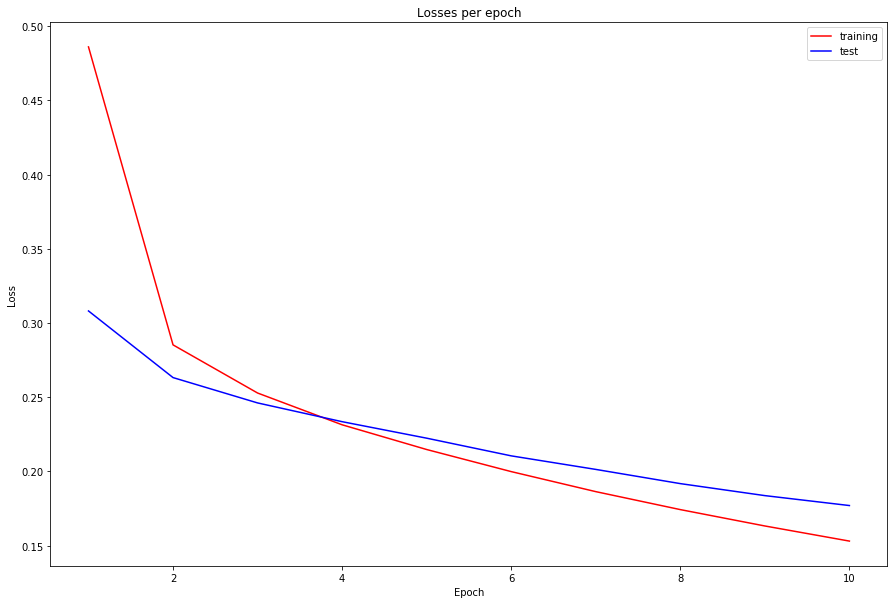

In [88]:
# We now want to plot the train and validation loss functions and accuracy curves
print(history.history.keys())
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
epochs=np.arange(1,11)
loss=history_sig.history['loss']
val_loss=history_sig.history['val_loss']
plt.plot(epochs,loss,color='r',label='training')
plt.plot(epochs,val_loss,color='b',label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Losses per epoch')
plt.legend()
plt.show()

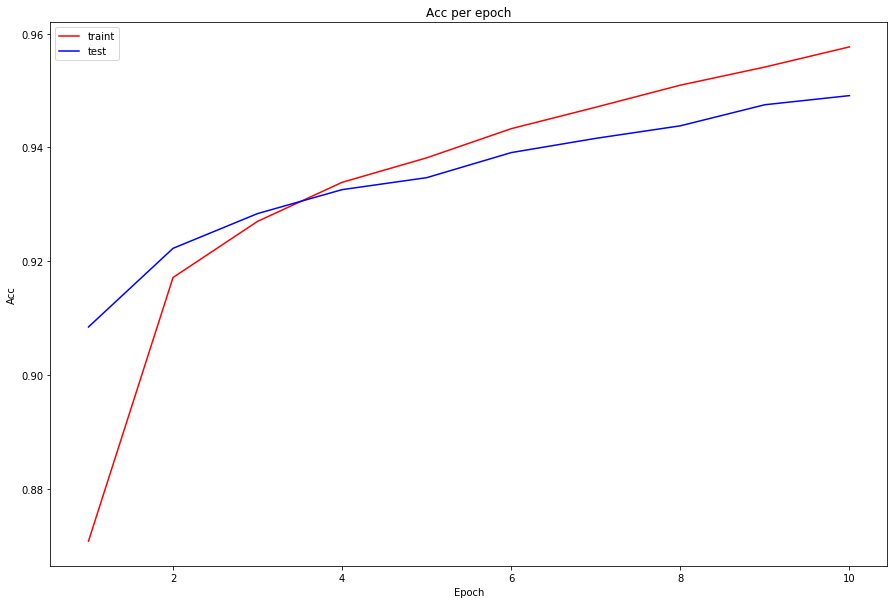

In [89]:
#Accuracies
plt.figure(figsize=(15,10))
epochs=np.arange(1,11)
acc=history_sig.history['accuracy']
val_acc=history_sig.history['val_accuracy']
plt.plot(epochs,acc,color='r',label='traint')
plt.plot(epochs,val_acc,color='b',label='test')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.title('Acc per epoch')
plt.legend()
plt.show()

From these two graphs, we can observe that the accuracy reaches 0.95 on both train and testing set. Moreover, the loss of the two sets are converging toward the same value, which means we do not have overfitting on the training set. This training is of a good quality: it has good result and do not overfit. 

## Experiments

Note down the performance of the larger network in terms of training and validation accuracy as a reference (save the loss/accuracy graphs of the network).

Then, experiment as follow and compare performance with the reference scenario:

*  Experiment increasing the size of the batch and compare the performance with reference.
*  Experiment replacing the sigmoid activations with Relus and note what happens.
*  Experiment with a larger architecture, for example: 
$$ (784) \rightarrow (300) \rightarrow (128) \rightarrow (84) \rightarrow (10) $$

### 1 - Size of the batch increase

In [90]:
eta = 0.01
sgd = optimizers.SGD(lr = eta)
history_size = []
size = [10, 50, 100, 250, 500, 1024, 2048]
executionTime = []
for i in range(7):
    print ('Step ' + str(i))
    start_time = time.time()
    model = Sequential()
    model.add(Dense(300, input_dim = input_shape, activation='sigmoid'))
    model.add(Dense(output_shape, activation='softmax'))
    model.compile(loss ='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
    history_size.append(model.fit(train_images, train_labels, epochs=10, batch_size=size[i],verbose=0,validation_data=(test_images,test_labels)))
    executionTime.append(time.time()-start_time)

Step 0
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 37s - loss: 0.4832 - accuracy: 0.8722 - val_loss: 0.3035 - val_accuracy: 0.9113
Epoch 2/10
 - 41s - loss: 0.2848 - accuracy: 0.9177 - val_loss: 0.2621 - val_accuracy: 0.9228
Epoch 3/10
 - 38s - loss: 0.2520 - accuracy: 0.9274 - val_loss: 0.2456 - val_accuracy: 0.9300
Epoch 4/10
 - 34s - loss: 0.2310 - accuracy: 0.9332 - val_loss: 0.2357 - val_accuracy: 0.9319
Epoch 5/10
 - 41s - loss: 0.2145 - accuracy: 0.9384 - val_loss: 0.2210 - val_accuracy: 0.9360
Epoch 6/10
 - 38s - loss: 0.1994 - accuracy: 0.9434 - val_loss: 0.2122 - val_accuracy: 0.9386
Epoch 7/10
 - 38s - loss: 0.1862 - accuracy: 0.9471 - val_loss: 0.2055 - val_accuracy: 0.9419
Epoch 8/10
 - 39s - loss: 0.1741 - accuracy: 0.9510 - val_loss: 0.1937 - val_accuracy: 0.9439
Epoch 9/10
 - 35s - loss: 0.1631 - accuracy: 0.9545 - val_loss: 0.1857 - val_accuracy: 0.9464
Epoch 10/10
 - 40s - loss: 0.1530 - accuracy: 0.9574 - val_loss: 0.1786 - val_accuracy: 0.9481
St

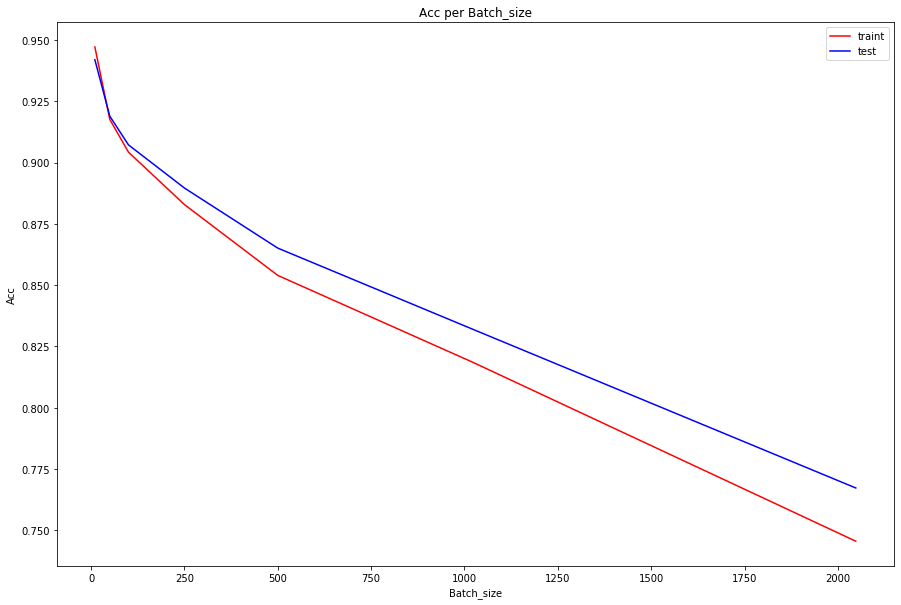

In [91]:
plt.figure(figsize=(15,10))
acc2, val_acc2=[],[]
for i in range(7):
    acc2.append(history_size[i].history['accuracy'][6])
    val_acc2.append(history_size[i].history['val_accuracy'][6])
plt.plot(size,acc2,color='r',label='traint')
plt.plot(size,val_acc2,color='b',label='test')
plt.xlabel('Batch_size')
plt.ylabel('Acc')
plt.title('Acc per Batch_size')
plt.legend()
plt.show()

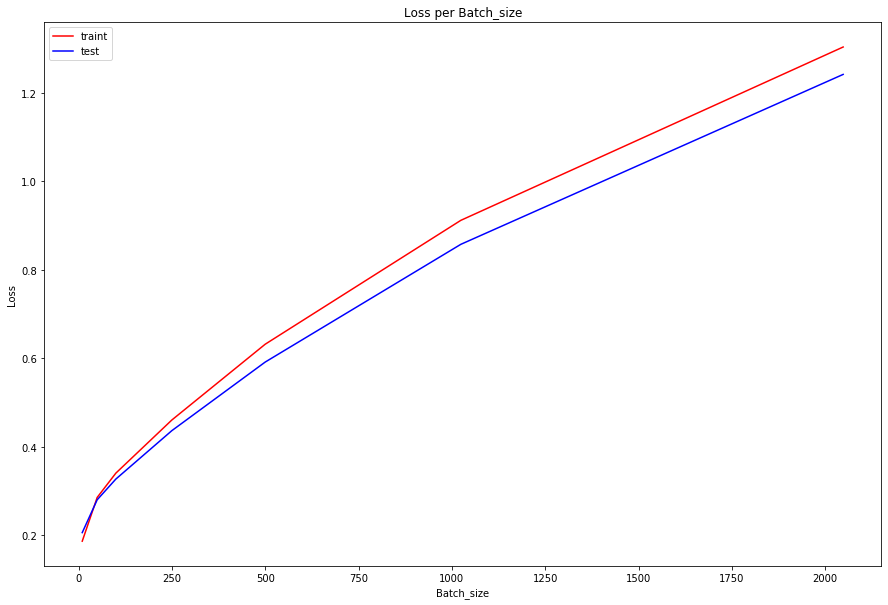

In [92]:
plt.figure(figsize=(15,10))
loss2, val_loss2=[],[]
for i in range(7):
    loss2.append(history_size[i].history['loss'][6])
    val_loss2.append(history_size[i].history['val_loss'][6])
plt.plot(size,loss2,color='r',label='traint')
plt.plot(size,val_loss2,color='b',label='test')
plt.xlabel('Batch_size')
plt.ylabel('Loss')
plt.title('Loss per Batch_size')
plt.legend()
plt.show()

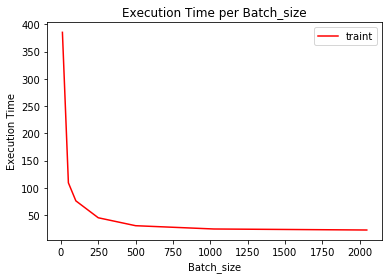

In [93]:
plt.plot(size,executionTime,color='r',label='traint')
plt.xlabel('Batch_size')
plt.ylabel('Execution Time')
plt.title('Execution Time per Batch_size')
plt.legend()
plt.show()

When we increase the batch size, the accuracy of the model disminish. This behaviour is a bit counter-intuitive since the size of the batch would help get a more precise information.  

### 2 - Relus modification

In [99]:
eta = 0.01

model_sig = Sequential()
model_sig.add(Dense(300, input_dim=input_shape, activation='sigmoid'))
model_sig.add(Dense(output_shape, activation='softmax'))

sgd = optimizers.SGD(lr = eta)
model_sig.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

history_sig=model_sig.fit(train_images, train_labels, epochs=20, verbose=0, validation_data=(test_images,test_labels))

model_relu = Sequential()
model_relu.add(Dense(300, input_dim = input_shape, activation='relu'))
model_relu.add(Dense(output_shape, activation = 'softmax'))

sgd = optimizers.SGD(lr = eta)
model_relu.compile(loss ='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])



history_relu = model_relu.fit(train_images, train_labels, epochs=20,verbose=0,validation_data=(test_images,test_labels))

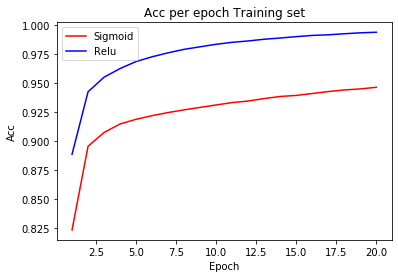

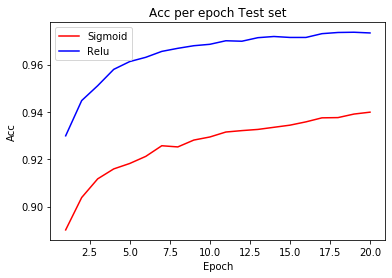

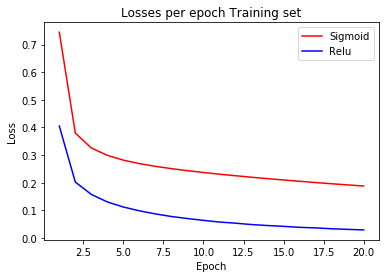

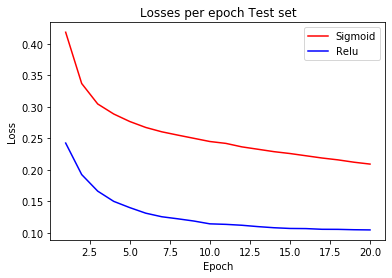

In [100]:
epochs=np.arange(1,21)

plt.plot(epochs,history_sig.history['accuracy'],color='r',label='Sigmoid')
plt.plot(epochs,history_relu.history['accuracy'],color='b',label='Relu')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.title('Acc per epoch Training set')
plt.legend()
plt.show()

plt.plot(epochs, history_sig.history['val_accuracy'], color='r',label='Sigmoid')
plt.plot(epochs, history_relu.history['val_accuracy'], color='b',label='Relu')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.title('Acc per epoch Test set')
plt.legend()
plt.show()

plt.plot(epochs,history_sig.history['loss'],color='r',label='Sigmoid')
plt.plot(epochs,history_relu.history['loss'],color='b',label='Relu')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Losses per epoch Training set')
plt.legend()
plt.show()

plt.plot(epochs,history_sig.history['val_loss'],color='r',label='Sigmoid')
plt.plot(epochs,history_relu.history['val_loss'],color='b',label='Relu')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Losses per epoch Test set')
plt.legend()
plt.show()

We can note that the Relu activation outperforms the sigmoid activation.  

### 3 - Larger architecture

In [114]:
model_big = Sequential()
model_big.add(Dense(300, input_dim = input_shape, activation='sigmoid'))
model_big.add(Dense(128, activation='sigmoid'))
model_big.add(Dense(84, activation='sigmoid'))
model_big.add(Dense(output_shape, activation = 'softmax'))

eta = 0.01
sgd = optimizers.SGD(lr = eta)
model_big.compile(loss ='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

history_big = model_big.fit(train_images, train_labels, epochs=20,verbose=0,validation_data=(test_images,test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 12s - loss: 2.2340 - accuracy: 0.2747 - val_loss: 2.1230 - val_accuracy: 0.5444
Epoch 2/20
 - 12s - loss: 1.7911 - accuracy: 0.5834 - val_loss: 1.3508 - val_accuracy: 0.6469
Epoch 3/20
 - 12s - loss: 1.0657 - accuracy: 0.7145 - val_loss: 0.8604 - val_accuracy: 0.7657
Epoch 4/20
 - 11s - loss: 0.7514 - accuracy: 0.7972 - val_loss: 0.6498 - val_accuracy: 0.8331
Epoch 5/20
 - 12s - loss: 0.5878 - accuracy: 0.8424 - val_loss: 0.5234 - val_accuracy: 0.8576
Epoch 6/20
 - 11s - loss: 0.4891 - accuracy: 0.8663 - val_loss: 0.4493 - val_accuracy: 0.8722
Epoch 7/20
 - 11s - loss: 0.4282 - accuracy: 0.8800 - val_loss: 0.4038 - val_accuracy: 0.8835
Epoch 8/20
 - 11s - loss: 0.3884 - accuracy: 0.8899 - val_loss: 0.3726 - val_accuracy: 0.8912
Epoch 9/20
 - 12s - loss: 0.3606 - accuracy: 0.8960 - val_loss: 0.3511 - val_accuracy: 0.8957
Epoch 10/20
 - 11s - loss: 0.3394 - accuracy: 0.9022 - val_loss: 0.3326 - val_accuracy: 0.9031
Epoch 11/

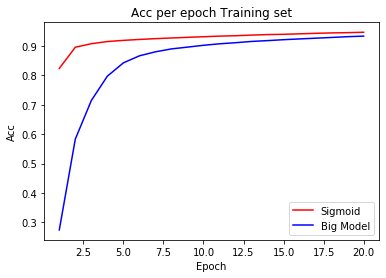

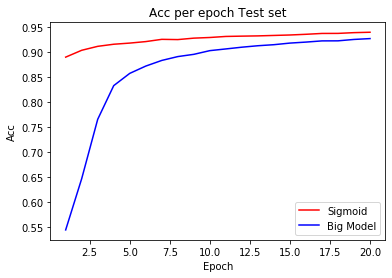

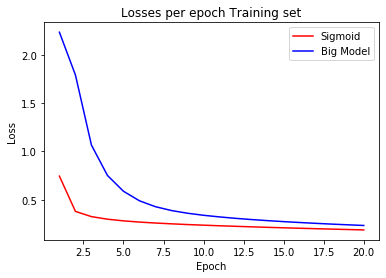

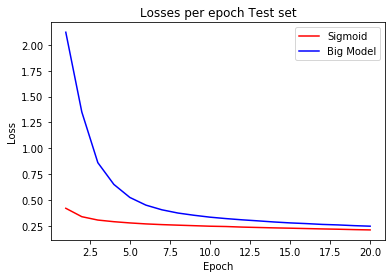

In [115]:
epochs = np.arange(1, 21)

plt.plot(epochs,history_sig.history['accuracy'],color='r',label='Sigmoid')
plt.plot(epochs,history_big.history['accuracy'],color='b',label='Big Model')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.title('Acc per epoch Training set')
plt.legend()
plt.show()

plt.plot(epochs, history_sig.history['val_accuracy'], color='r',label='Sigmoid')
plt.plot(epochs, history_big.history['val_accuracy'], color='b',label='Big Model')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.title('Acc per epoch Test set')
plt.legend()
plt.show()

plt.plot(epochs,history_sig.history['loss'],color='r',label='Sigmoid')
plt.plot(epochs,history_big.history['loss'],color='b',label='Big Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Losses per epoch Training set')
plt.legend()
plt.show()

plt.plot(epochs,history_sig.history['val_loss'],color='r',label='Sigmoid')
plt.plot(epochs,history_big.history['val_loss'],color='b',label='Big Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Losses per epoch Test set')
plt.legend()
plt.show()

The bigger model doesn't outperform the first model, this result is a bit counter-intuitive. 